# PE Validation Fall 20

In [1]:
# import necessary modules 
# please run this everytime you open it
import pandas as pd 
import numpy as np 
import matplotlib as plt 
import seaborn as sns

Task1:

In [2]:
# figure out a way to read in schema txt files (inside the schema folder)
# for example, I have a source file (such as Source_relevance.csv) and 
# I know the question_label, but I want to build a function to know 
# whether this question (Q1/Q2..) is multiple-choice or checklist
# build a function to accomplish this
# func(schemafile(...txt), input(..csv), question_label(Q1/Q2...)) -> checlist/multiple choice 

Task2: 

In [3]:
# not only do I want to know whether it's multiple-choice or checklist 
# I also want to know how many different answer choices are there
# build a function to accomplish this 
# func(schemafile(...txt), input(..csv), question_label(Q1/Q2...)) -> # of different answer choices

Task3:

In [4]:
# figure out how to uniquely identify each submission, 
# since there might be one contributor who made 
# several submissions. 
# can't use contributor_uuid. What to use? 

Task4: 

In [5]:
# one-hot-encode checklist questions to [0, 1]
# for example, Q4 in source relevance task is a checklist question
# if someone selects both A1 and A2, then it's [1, 1]
# return a dataframe that has each question_label but list out the answers in [] format. 

## Experimentation ground below: 

## Charlie

## Katherine

## Yewen

### Questions: 

In [6]:
# read json lines file 
data = pd.read_json('2020 data/2020-09-25_pe_webhooks.jsonl', lines=True)
data.head()

,created,elapsed_time,event,finish_time,fired_at,project_id,project_short_name,result_id,task_id,task_run_id,user_id
0,2017-08-01T15:57:30.881416+00:00,65,in_progress,2017-08-01 15:58:36.041998,2020-09-27 23:27:59,3,8-1-17-PE-SchemaTest,0,6,1,4.0
1,2017-08-01T15:57:31.042516+00:00,111,in_progress,2017-08-01 15:59:22.502185,2020-09-27 23:27:59,3,8-1-17-PE-SchemaTest,0,7,2,4.0
2,2017-11-03T01:32:11.516170+00:00,53,task_completed,2017-11-03 01:33:05.189640,2020-09-27 23:27:59,10,Testy,0,42,30,2.0
3,2017-11-03T01:32:11.673225+00:00,77,task_completed,2017-11-03 01:33:29.323346,2020-09-27 23:27:59,10,Testy,0,43,31,2.0
4,2017-11-03T01:33:05.446322+00:00,54,task_completed,2017-11-03 01:33:59.506915,2020-09-27 23:27:59,10,Testy,0,44,32,2.0


Bootstrapping: 1) how to deal with categorical variables? 2) max? 3) confidence interval?  

**Is this question a good question? Use the Quoted Source Specialist as an example** 

In [7]:
# read in quoted source csv 
source = pd.read_csv("2020 data/Covid_SourceRelevancev1-2020-10-04T1838-DataHunt.csv")
source.head()

,namespace,schema_sha256,quiz_task_uuid,task_url,tua_uuid,article_batch_name,article_number,article_filename,article_sha256,article_text_length,...,answer_label,answer_content,answer_uuid,submitted_tua_uuid,answer_text,case_number,highlight_count,start_pos,end_pos,target_text
0,Covid_Sources_2002_03_20v2.1,a6b4870c9329437fdad00a93adde41702f8693f96167ef...,9d4ac736-52b7-40df-b2a9-6164fa081960,https://pe.goodlylabs.org/project/Covid_Source...,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,CovidArticles/2005CIAReportOnCoronavirus.txt,2005,2005CIAReportOnCoronavirus.txt,47990959103662e94e796d979018922afddc880fb4b867...,3885,...,T1.Q1.A1,What the source has said or written is newswor...,cb44583b-2234-463b-a084-1daaf1890d88,c28bba2c-2301-49c8-a160-5fd808c36f51,What the source has said or written is newswor...,0,0,0,0,NaN
1,Covid_Sources_2002_03_20v2.1,a6b4870c9329437fdad00a93adde41702f8693f96167ef...,9d4ac736-52b7-40df-b2a9-6164fa081960,https://pe.goodlylabs.org/project/Covid_Source...,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,CovidArticles/2005CIAReportOnCoronavirus.txt,2005,2005CIAReportOnCoronavirus.txt,47990959103662e94e796d979018922afddc880fb4b867...,3885,...,T1.Q2.A1,"Yes, definitely",0d9f8841-407c-43af-8103-486c2c6aab56,5569d45e-31a3-415b-bd63-875df663853a,"Yes, definitely",0,0,0,0,NaN
2,Covid_Sources_2002_03_20v2.1,a6b4870c9329437fdad00a93adde41702f8693f96167ef...,9d4ac736-52b7-40df-b2a9-6164fa081960,https://pe.goodlylabs.org/project/Covid_Source...,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,CovidArticles/2005CIAReportOnCoronavirus.txt,2005,2005CIAReportOnCoronavirus.txt,47990959103662e94e796d979018922afddc880fb4b867...,3885,...,T1.Q3.A2,No,830590a6-c418-4ac8-ae04-a37ef06981a1,0f279670-9026-4381-91a3-7155a50dc24a,No,0,0,0,0,NaN
3,Covid_Sources_2002_03_20v2.1,a6b4870c9329437fdad00a93adde41702f8693f96167ef...,9d4ac736-52b7-40df-b2a9-6164fa081960,https://pe.goodlylabs.org/project/Covid_Source...,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,CovidArticles/2005CIAReportOnCoronavirus.txt,2005,2005CIAReportOnCoronavirus.txt,47990959103662e94e796d979018922afddc880fb4b867...,3885,...,T1.Q5.A7,"Organization (e.g. ""from House Stark"" or ""of t...",b769a715-d94f-40c0-819e-7583c8d74f5e,2d1cdf38-81c0-48c8-93b3-b43058487cff,"Organization (e.g. ""from House Stark"" or ""of t...",1,2,2474,2484,CIA report
4,Covid_Sources_2002_03_20v2.1,a6b4870c9329437fdad00a93adde41702f8693f96167ef...,9d4ac736-52b7-40df-b2a9-6164fa081960,https://pe.goodlylabs.org/project/Covid_Source...,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,CovidArticles/2005CIAReportOnCoronavirus.txt,2005,2005CIAReportOnCoronavirus.txt,47990959103662e94e796d979018922afddc880fb4b867...,3885,...,T1.Q5.A7,"Organization (e.g. ""from House Stark"" or ""of t...",b769a715-d94f-40c0-819e-7583c8d74f5e,2d1cdf38-81c0-48c8-93b3-b43058487cff,"Organization (e.g. ""from House Stark"" or ""of t...",1,2,188,198,CIA report


In [8]:
# how many entries are there? 
source.shape

(3081, 31)

In [9]:
# columns 
source.columns

Index(['namespace', 'schema_sha256', 'quiz_task_uuid', 'task_url', 'tua_uuid',
       'article_batch_name', 'article_number', 'article_filename',
       'article_sha256', 'article_text_length', 'destination',
       'task_redundancy', 'taskrun_count', 'quiz_taskrun_uuid',
       'contributor_uuid', 'created', 'finish_time', 'elapsed_seconds',
       'topic_name', 'question_label', 'question_text', 'answer_label',
       'answer_content', 'answer_uuid', 'submitted_tua_uuid', 'answer_text',
       'case_number', 'highlight_count', 'start_pos', 'end_pos',
       'target_text'],
      dtype='object')

In [10]:
# only use Q2 as an example, only look at questions/answeres now 
filtered = source[["contributor_uuid", "question_label", "answer_label", "answer_content", "answer_text"]]
filtered.head()

,contributor_uuid,question_label,answer_label,answer_content,answer_text
0,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q2,T1.Q2.A1,"Yes, definitely","Yes, definitely"
2,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q3,T1.Q3.A2,No,No
3,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q5,T1.Q5.A7,"Organization (e.g. ""from House Stark"" or ""of t...","Organization (e.g. ""from House Stark"" or ""of t..."
4,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q5,T1.Q5.A7,"Organization (e.g. ""from House Stark"" or ""of t...","Organization (e.g. ""from House Stark"" or ""of t..."


In [11]:
# only look at question label Q2 
ques_two = filtered[filtered["question_label"] == "T1.Q2"]
ques_two.head()

,contributor_uuid,question_label,answer_label,answer_content,answer_text
1,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q2,T1.Q2.A1,"Yes, definitely","Yes, definitely"
18,e44f5799-6915-45fd-874e-060f6afedcb9,T1.Q2,T1.Q2.A2,Yes,Yes
40,fed45769-aa61-4b8b-847e-a9c799acce15,T1.Q2,T1.Q2.A2,Yes,Yes
53,fb4ae4cc-234b-484a-b541-a8e3a9254a24,T1.Q2,T1.Q2.A1,"Yes, definitely","Yes, definitely"
73,3bb03f58-5f09-4414-b54e-43a814b9b09a,T1.Q2,T1.Q2.A1,"Yes, definitely","Yes, definitely"


In [12]:
# how many Q2 are there? 
ques_two.shape

(258, 5)

In [13]:
# how many different kinds of answers are there? Might need to implement a function here to know 
diff = ques_two["answer_label"].unique()
diff

array(['T1.Q2.A1', 'T1.Q2.A2', 'T1.Q2.A5', 'T1.Q2.A3', 'T1.Q2.A7',
       'T1.Q2.A6', 'T1.Q2.A4', 'T1.Q2.A8'], dtype=object)

In [14]:
# not a very good way but it works 
len(ques_two["answer_label"].unique())

8

In [15]:
# calculate the proportion of each answer choices: can implement a function again 
diff.sort()
# the maximum of prop
maximum = 0 
maximum_ans = ''
for ans in diff:
    # proportion 
    prop = ques_two[ques_two["answer_label"] == ans].shape[0] / ques_two.shape[0]
    if prop > maximum: 
        maximum = prop
        maximum_ans = ans 
    print("proportion of " + ans + " is " + str(prop))
print("The maximum is " + maximum_ans + " with proportion " + str(maximum))

proportion of T1.Q2.A1 is 0.09689922480620156
proportion of T1.Q2.A2 is 0.25193798449612403
proportion of T1.Q2.A3 is 0.12403100775193798
proportion of T1.Q2.A4 is 0.015503875968992248
proportion of T1.Q2.A5 is 0.3449612403100775
proportion of T1.Q2.A6 is 0.08914728682170543
proportion of T1.Q2.A7 is 0.06589147286821706
proportion of T1.Q2.A8 is 0.011627906976744186
The maximum is T1.Q2.A5 with proportion 0.3449612403100775


Assume each answer choice is selected with the same probability of 1/8, null hypothesis: in the population, each answer choice is selected randomly with same probability from the population = 1/8. Alternative hypothesis: ...is not 1/8. 

In [16]:
# sample with replacement; could be a function here 
# B : number of bootstrap samples
B = 10000
# output 
output = []
for i in np.arange(B): 
    # construct an array 
    a = np.random.choice(diff, size=filtered.shape[0], replace=True)
    # calculate the statistics - the proportion of A5 
    prop = np.sum(a == "T1.Q2.A5") / len(a)
    output.append(prop)
output = np.array(output)

array([0.11327491, 0.13664395])

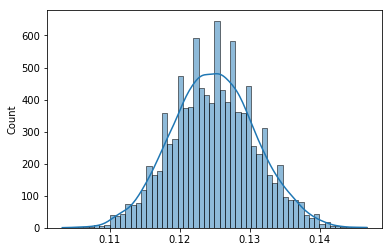

In [17]:
# plot a histogram 
ax = sns.histplot(output, kde=True)
# compute a 95% CI 
CI = np.percentile(output, [2.5, 97.5])
CI

In [18]:
# compute the p-value 
p_value = np.mean(output >= maximum)
p_value

0.0

Therefore, we reject the null hypothesis with 95% confidence. 

**how about multi-choice questions?**

In [19]:
# select Q1 which is multi-choice 
ques_one = filtered[filtered["question_label"] == "T1.Q1"].sort_values("contributor_uuid")
ques_one

,contributor_uuid,question_label,answer_label,answer_content,answer_text
0,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1299,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
793,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A2,"The source is offering commentary, explanation...","The source is offering commentary, explanation..."
1915,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A2,"The source is offering commentary, explanation...","The source is offering commentary, explanation..."
2251,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1822,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1717,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
443,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1616,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
1501,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q1,T1.Q1.A2,"The source is offering commentary, explanation...","The source is offering commentary, explanation..."


In [20]:
# output row 128 and 129 
filtered.iloc[[128, 129]]

,contributor_uuid,question_label,answer_label,answer_content,answer_text
128,38b9cf3a-588d-4137-a975-af770121a925,T1.Q1,T1.Q1.A1,What the source has said or written is newswor...,What the source has said or written is newswor...
129,38b9cf3a-588d-4137-a975-af770121a925,T1.Q1,T1.Q1.A2,"The source is offering commentary, explanation...","The source is offering commentary, explanation..."


**the multi-choice answers is not listed together!**

In [21]:
source.columns

Index(['namespace', 'schema_sha256', 'quiz_task_uuid', 'task_url', 'tua_uuid',
       'article_batch_name', 'article_number', 'article_filename',
       'article_sha256', 'article_text_length', 'destination',
       'task_redundancy', 'taskrun_count', 'quiz_taskrun_uuid',
       'contributor_uuid', 'created', 'finish_time', 'elapsed_seconds',
       'topic_name', 'question_label', 'question_text', 'answer_label',
       'answer_content', 'answer_uuid', 'submitted_tua_uuid', 'answer_text',
       'case_number', 'highlight_count', 'start_pos', 'end_pos',
       'target_text'],
      dtype='object')

In [22]:
source[source["contributor_uuid"] == "00f548b7-6b63-4b47-828e-8e416b6ca0e2"][["contributor_uuid", "created", "finish_time", "elapsed_seconds", "question_label", "answer_label", "answer_uuid"]]

,contributor_uuid,created,finish_time,elapsed_seconds,question_label,answer_label,answer_uuid
0,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q1,T1.Q1.A1,cb44583b-2234-463b-a084-1daaf1890d88
1,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q2,T1.Q2.A1,0d9f8841-407c-43af-8103-486c2c6aab56
2,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q3,T1.Q3.A2,830590a6-c418-4ac8-ae04-a37ef06981a1
3,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q5,T1.Q5.A7,b769a715-d94f-40c0-819e-7583c8d74f5e
4,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q5,T1.Q5.A7,b769a715-d94f-40c0-819e-7583c8d74f5e
5,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q5,T1.Q5.A6,38facd55-9bda-4907-aad4-9b956563e6c7
6,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q5,T1.Q5.A9,fcd891a5-40a2-4af0-bfbf-c609d91958a6
7,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q5,T1.Q5.A9,fcd891a5-40a2-4af0-bfbf-c609d91958a6
8,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q6,T1.Q6.A1,fd3e139d-e365-488f-97c3-4a4131f238e2
9,00f548b7-6b63-4b47-828e-8e416b6ca0e2,2020-03-22 21:00:18.762675,2020-03-22 21:35:24.185786,2105.423111,T1.Q6,T1.Q6.A1,fd3e139d-e365-488f-97c3-4a4131f238e2


What's going on here? 

What can we do about multi-choice? <br> 
What other questions we are expected to address? <br> 

# K's algorithm 

Now only try working with multiple-choice nominal questions <br>
Example, Q2 in Source Relevance Specialist task

In [46]:
# only select rows that correspond to question 2 
ques_two_b = source[source["question_label"] == "T1.Q2"]

In [26]:
ques_two_b.columns

Index(['namespace', 'schema_sha256', 'quiz_task_uuid', 'task_url', 'tua_uuid',
       'article_batch_name', 'article_number', 'article_filename',
       'article_sha256', 'article_text_length', 'destination',
       'task_redundancy', 'taskrun_count', 'quiz_taskrun_uuid',
       'contributor_uuid', 'created', 'finish_time', 'elapsed_seconds',
       'topic_name', 'question_label', 'question_text', 'answer_label',
       'answer_content', 'answer_uuid', 'submitted_tua_uuid', 'answer_text',
       'case_number', 'highlight_count', 'start_pos', 'end_pos',
       'target_text'],
      dtype='object')

In [47]:
# experiment to find unique identifier 
ex = source[source["contributor_uuid"] == "00f548b7-6b63-4b47-828e-8e416b6ca0e2"]
ex = ex.loc[:, ["article_filename", "quiz_task_uuid", "contributor_uuid", "tua_uuid", "question_label", "answer_label", "submitted_tua_uuid", "answer_uuid"]]
ex

,article_filename,quiz_task_uuid,contributor_uuid,tua_uuid,question_label,answer_label,submitted_tua_uuid,answer_uuid
0,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q1,T1.Q1.A1,c28bba2c-2301-49c8-a160-5fd808c36f51,cb44583b-2234-463b-a084-1daaf1890d88
1,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q2,T1.Q2.A1,5569d45e-31a3-415b-bd63-875df663853a,0d9f8841-407c-43af-8103-486c2c6aab56
2,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q3,T1.Q3.A2,0f279670-9026-4381-91a3-7155a50dc24a,830590a6-c418-4ac8-ae04-a37ef06981a1
3,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q5,T1.Q5.A7,2d1cdf38-81c0-48c8-93b3-b43058487cff,b769a715-d94f-40c0-819e-7583c8d74f5e
4,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q5,T1.Q5.A7,2d1cdf38-81c0-48c8-93b3-b43058487cff,b769a715-d94f-40c0-819e-7583c8d74f5e
5,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q5,T1.Q5.A6,569825a6-ab40-46c0-b1fa-97cac4d454a0,38facd55-9bda-4907-aad4-9b956563e6c7
6,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q5,T1.Q5.A9,50cc3056-6b3c-4dad-b67d-b5925e3a0c0f,fcd891a5-40a2-4af0-bfbf-c609d91958a6
7,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q5,T1.Q5.A9,50cc3056-6b3c-4dad-b67d-b5925e3a0c0f,fcd891a5-40a2-4af0-bfbf-c609d91958a6
8,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q6,T1.Q6.A1,414e7540-4ea9-4ac1-a09f-59a1ea7571d4,fd3e139d-e365-488f-97c3-4a4131f238e2
9,2005CIAReportOnCoronavirus.txt,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,b9ba9740-1266-4b5c-b4c2-e8d6d22246c8,T1.Q6,T1.Q6.A1,414e7540-4ea9-4ac1-a09f-59a1ea7571d4,fd3e139d-e365-488f-97c3-4a4131f238e2


**tua_uuid can be used as a unique identifier!!!**

**can't use article_filename, since the same article can have multiple questions!!!**

**the same article can have different tasks (quiz_task_uuid) and different contributors.**

In [29]:
# let's see article filename
ques_two_b["article_filename"].unique()

array(['2005CIAReportOnCoronavirus.txt', 'USMightBeComplementingIran.txt',
       'USMilitaryMayHaveBrought.txt',
       'CoronavirusCanHerdImmunityReally.txt',
       'Over1000PeopleCuredOf.txt', 'SARS-CoV-2CanLiveOnPlastic.txt'],
      dtype=object)

In [48]:
# right now I will use different articles same question as an example
# might be wrong
# select tua_uuid as different observers 
pre = ques_two_b.loc[:, ["quiz_task_uuid", "contributor_uuid", "question_label", "answer_label"]]
pre.head()

,quiz_task_uuid,contributor_uuid,question_label,answer_label
1,9d4ac736-52b7-40df-b2a9-6164fa081960,00f548b7-6b63-4b47-828e-8e416b6ca0e2,T1.Q2,T1.Q2.A1
18,9d4ac736-52b7-40df-b2a9-6164fa081960,e44f5799-6915-45fd-874e-060f6afedcb9,T1.Q2,T1.Q2.A2
40,9d4ac736-52b7-40df-b2a9-6164fa081960,fed45769-aa61-4b8b-847e-a9c799acce15,T1.Q2,T1.Q2.A2
53,9d4ac736-52b7-40df-b2a9-6164fa081960,fb4ae4cc-234b-484a-b541-a8e3a9254a24,T1.Q2,T1.Q2.A1
73,9d4ac736-52b7-40df-b2a9-6164fa081960,3bb03f58-5f09-4414-b54e-43a814b9b09a,T1.Q2,T1.Q2.A1


Construct the **reliability data matrix**

In [51]:
# convert the df to pivot_table 
pv = pd.pivot_table(data=pre, index="contributor_uuid", columns="quiz_task_uuid", values="answer_label", aggfunc=list)
pv

quiz_task_uuid,00ef0777-da36-47b0-94d4-135eb520bcfb,0214dcdb-838e-4947-8a8e-7cc8f8f2fce6,08e6aae7-56c5-4c0f-8517-d2a7f2bc5895,1b4d23d1-fa87-44fe-b5b2-1a5909246b66,23699e71-779c-4a97-81aa-e0bdc8c69432,3032089b-c0e4-4f39-ac05-98e135113625,4479a237-11ec-4a69-bab1-090b44fb62a9,65fc3c92-5aef-4fef-a3c4-56145a077a33,72f6d8cc-9f38-4040-b08c-c9623db19f41,7995a0fe-1c4a-4d51-9064-1897e7fdf297,...,a84b3b17-d59f-4350-815b-e7793ff1f76f,b27a22c1-bea6-4620-abfa-428d27316d2a,b2846191-15d5-4129-983d-ee94ad66e9c9,b4ae9d51-4923-4765-a6b2-049afe8ec571,b4d3861f-5db7-4def-b3d8-14ab384985b5,bd930f84-9d64-49b5-a922-eb99ae49239f,c00936dc-7aae-4082-9e2e-3c86c7e17956,d97d6501-b50f-4f8c-a3c5-59cd05a9b752,e399f1ca-2f2c-4803-ad87-6f5fe090ee33,e9de370c-d418-4200-b151-77404581a518
contributor_uuid,,,,,,,,,,,,,,,,,,,,,
00f548b7-6b63-4b47-828e-8e416b6ca0e2,[T1.Q2.A5],NaN,NaN,NaN,NaN,NaN,[T1.Q2.A5],[T1.Q2.A1],NaN,NaN,...,NaN,[T1.Q2.A5],[T1.Q2.A5],NaN,[T1.Q2.A3],NaN,NaN,[T1.Q2.A3],NaN,NaN
06e1eba7-c695-4495-85a7-2fb33ef9412c,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0b2ee377-65f2-4ac1-98da-5bc093fee7aa,[T1.Q2.A6],NaN,NaN,NaN,NaN,NaN,[T1.Q2.A6],[T1.Q2.A5],NaN,[T1.Q2.A5],...,NaN,NaN,[T1.Q2.A7],NaN,NaN,NaN,NaN,[T1.Q2.A5],NaN,NaN
0cdf31d0-1966-4f69-a0c8-c483788b5256,[T1.Q2.A2],NaN,NaN,NaN,NaN,NaN,[T1.Q2.A5],NaN,NaN,NaN,...,NaN,[T1.Q2.A5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0e4b8a3e-2714-4b5f-ba10-bb576aaa5cc6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0e81b339-ba89-48a6-b6eb-3160c5ac61db,[T1.Q2.A3],NaN,NaN,NaN,NaN,NaN,[T1.Q2.A5],NaN,NaN,NaN,...,NaN,[T1.Q2.A6],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0f369711-c76f-497a-bffe-4d10a3ab3619,[T1.Q2.A5],NaN,NaN,NaN,NaN,NaN,[T1.Q2.A5],NaN,NaN,NaN,...,NaN,[T1.Q2.A5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
172e9a38-d3e4-453e-8556-18bbd0fcb07e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23338303-8192-4d70-8e03-508a7120d1c3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,[T1.Q2.A5],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Geez, a lot of missing values! 

**construct a coincidence matrix**